## Test Module Conv2D

In [1]:
import sys
sys.path.insert(0, '../src')

# import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns
"""
Utils
"""
from termcolor import colored
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import random
import pandas as pd

"""
Modules principaux
"""
from Sequentiel import Sequentiel
from Optim import SGD, Optim
from Linear import Linear
from Flatten import Flatten
from Conv1D import Conv1D
from Conv2D import Conv2D
from MaxPool2D import MaxPool2D
from MaxPool1D import MaxPool1D
"""
Activation
"""
from activation.Softmax import Softmax
from activation.Sigmoide import Sigmoide
from activation.TanH import TanH
from activation.ReLU import ReLU
"""
Loss
"""
from loss.MSELoss import MSELoss
from loss.CELoss import CELoss
from loss.BCELoss import BCELoss
from loss.CELogSoftmax import CELogSoftmax as CELogSM

In [2]:
def OneHotEncoding(y):
    onehot = np.zeros((y.size,y.max()+1))
    onehot[np.arange(y.size),y]=1
    return onehot


def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [3]:
def main_Conv2d():
    #Load Data From USPS (TME4)
    uspsdatatrain = "data/USPS_train.txt"
    uspsdatatest = "data/USPS_test.txt"
    alltrainx, alltrainy = load_usps(uspsdatatrain)
    alltestx, alltesty = load_usps(uspsdatatest)
    
    alltrainx /= 2
    alltestx /= 2

    #taille couche
    alltrainy_oneHot = OneHotEncoding(alltrainy)
    alltesty_oneHot = OneHotEncoding(alltesty)
    alltrainx=alltrainx.reshape(alltrainx.shape[0],16,16,1)
    alltestx=alltestx.reshape(alltestx.shape[0],16,16,1)

    iteration = 3
    gradient_step = 1e-3
    batch_size = 30

    l1=Conv2D(3,1,64, biais = False) 
    l2=MaxPool2D(2,2) 
    l3=Flatten()
    l4=Linear(3136,100) 
    l5=ReLU(0) 
    l6=Linear(100,10)
    
    model = Sequentiel(l1,l2,l3,l4,l5,l6)
    loss = CELogSM()
    opt = SGD(model,loss,alltrainx, alltrainy_oneHot, batch_size, nbIter=iteration,eps=gradient_step)
    list_loss = opt.update()
    
    predict = model.forward(alltrainx)
    predict = np.argmax(predict, axis=1)

    predict_test = model.forward(alltestx)
    predict_test = np.argmax(predict_test, axis=1)

    print(predict.shape)
    print(alltrainy.shape)

    print("Precision sur l'ensemble d'entrainement",((np.sum(np.where(predict == alltrainy, 1, 0)) / len(predict))*100),"%")
    print("Precision sur l'ensemble de test",((np.sum(np.where(predict_test == alltesty, 1, 0)) / len(predict_test))*100),"%")
   

    taux_train = ((np.argmax( opt.net.forward(alltrainx),axis = 1) == alltrainy).mean()*100)
    taux_test = ((np.argmax( opt.net.forward(alltestx),axis = 1) == alltesty).mean()*100)
    print("Taux de bonne classification en train : ",taux_train,"%")
    print("Taux de bonne classification en test : ",taux_test,"%")

    """
    AFFICHAGE DE LA LOSS
    """
    plt.figure()
    plt.xlabel("nombre d'iteration")
    plt.ylabel("Erreur CElogSM")
    plt.title("Evolution de l'erreur")
    plt.plot(list_loss,label="Erreur")
    plt.legend()
    plt.show()

    """
    MATRICE DE CONFUSION
    """

    plt.figure()
    confusion = confusion_matrix(predict, alltrainy)
    ax = sns.heatmap(confusion, annot=True, cmap='Blues')
    ax.set_title(f"Matrice de confusion pour données USPS Train \ acc = {taux_train}%\n\n")
    ax.set_xlabel('\nChiffre prédit')
    ax.set_ylabel('Vrai chiffre ')
    ax.xaxis.set_ticklabels(np.arange(10))
    ax.yaxis.set_ticklabels(np.arange(10))
    plt.show()


    plt.figure()
    confusion = confusion_matrix(predict_test, alltesty)
    ax = sns.heatmap(confusion, annot=True, cmap='Blues')
    ax.set_title(f"Matrice de confusion pour données USPS Test \ acc = {taux_test}%\n\n")
    ax.set_xlabel('\nChiffre prédit')
    ax.set_ylabel('Vrai chiffre ')
    ax.xaxis.set_ticklabels(np.arange(10))
    ax.yaxis.set_ticklabels(np.arange(10))
    plt.show()

100%|██████████| 3/3 [00:13<00:00,  4.43s/it]


(7291,)
(7291,)
Precision sur l'ensemble d'entrainement 83.84309422575778 %
Precision sur l'ensemble de test 77.22969606377677 %
Taux de bonne classification en train :  83.84309422575778 %
Taux de bonne classification en test :  77.22969606377677 %


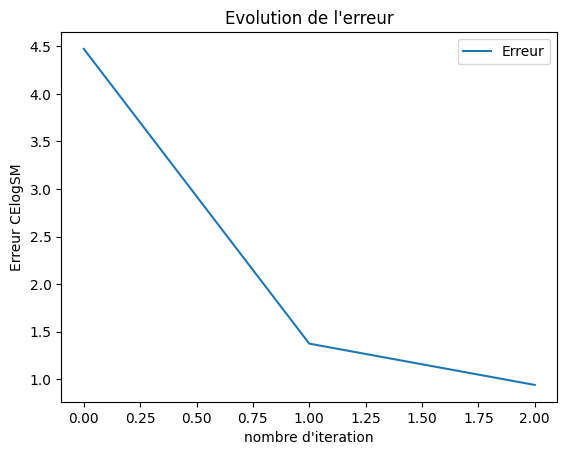

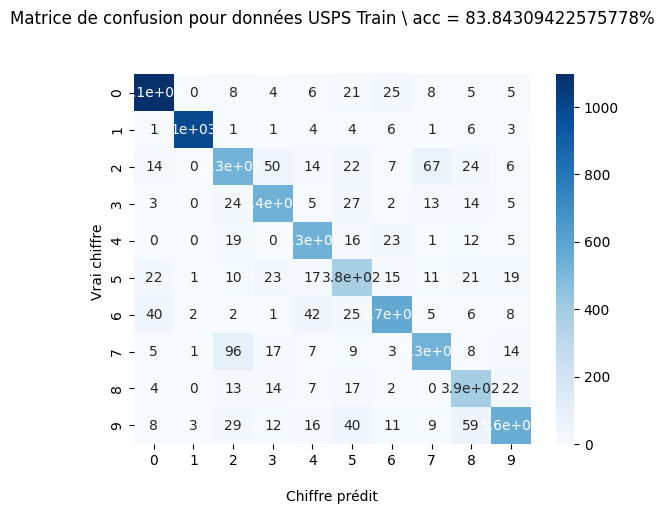

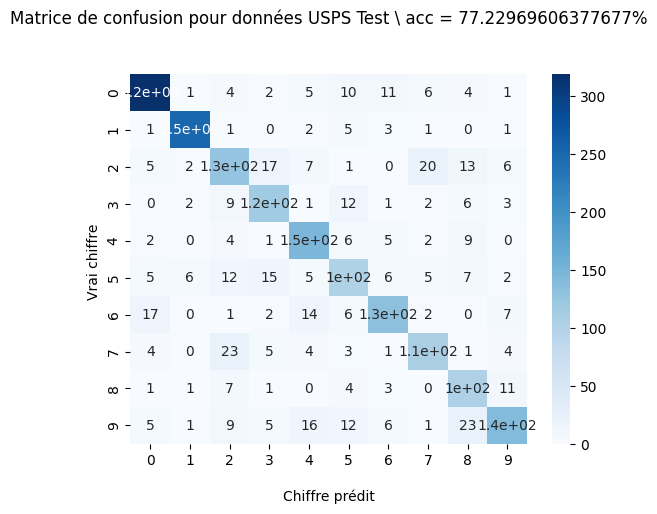

In [4]:
main_Conv2d()